In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from pathlib import Path

from src import Lorentz
from src import TSProcessor

%load_ext autoreload
%autoreload 2

In [3]:
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

def denormalize(arr, min, max):
    return arr * (max - min) + min

In [4]:
x, _, _ = Lorentz().generate(0.1, 100000)

x_max = x.max()
x_min = x.min()
x = normalize(x)

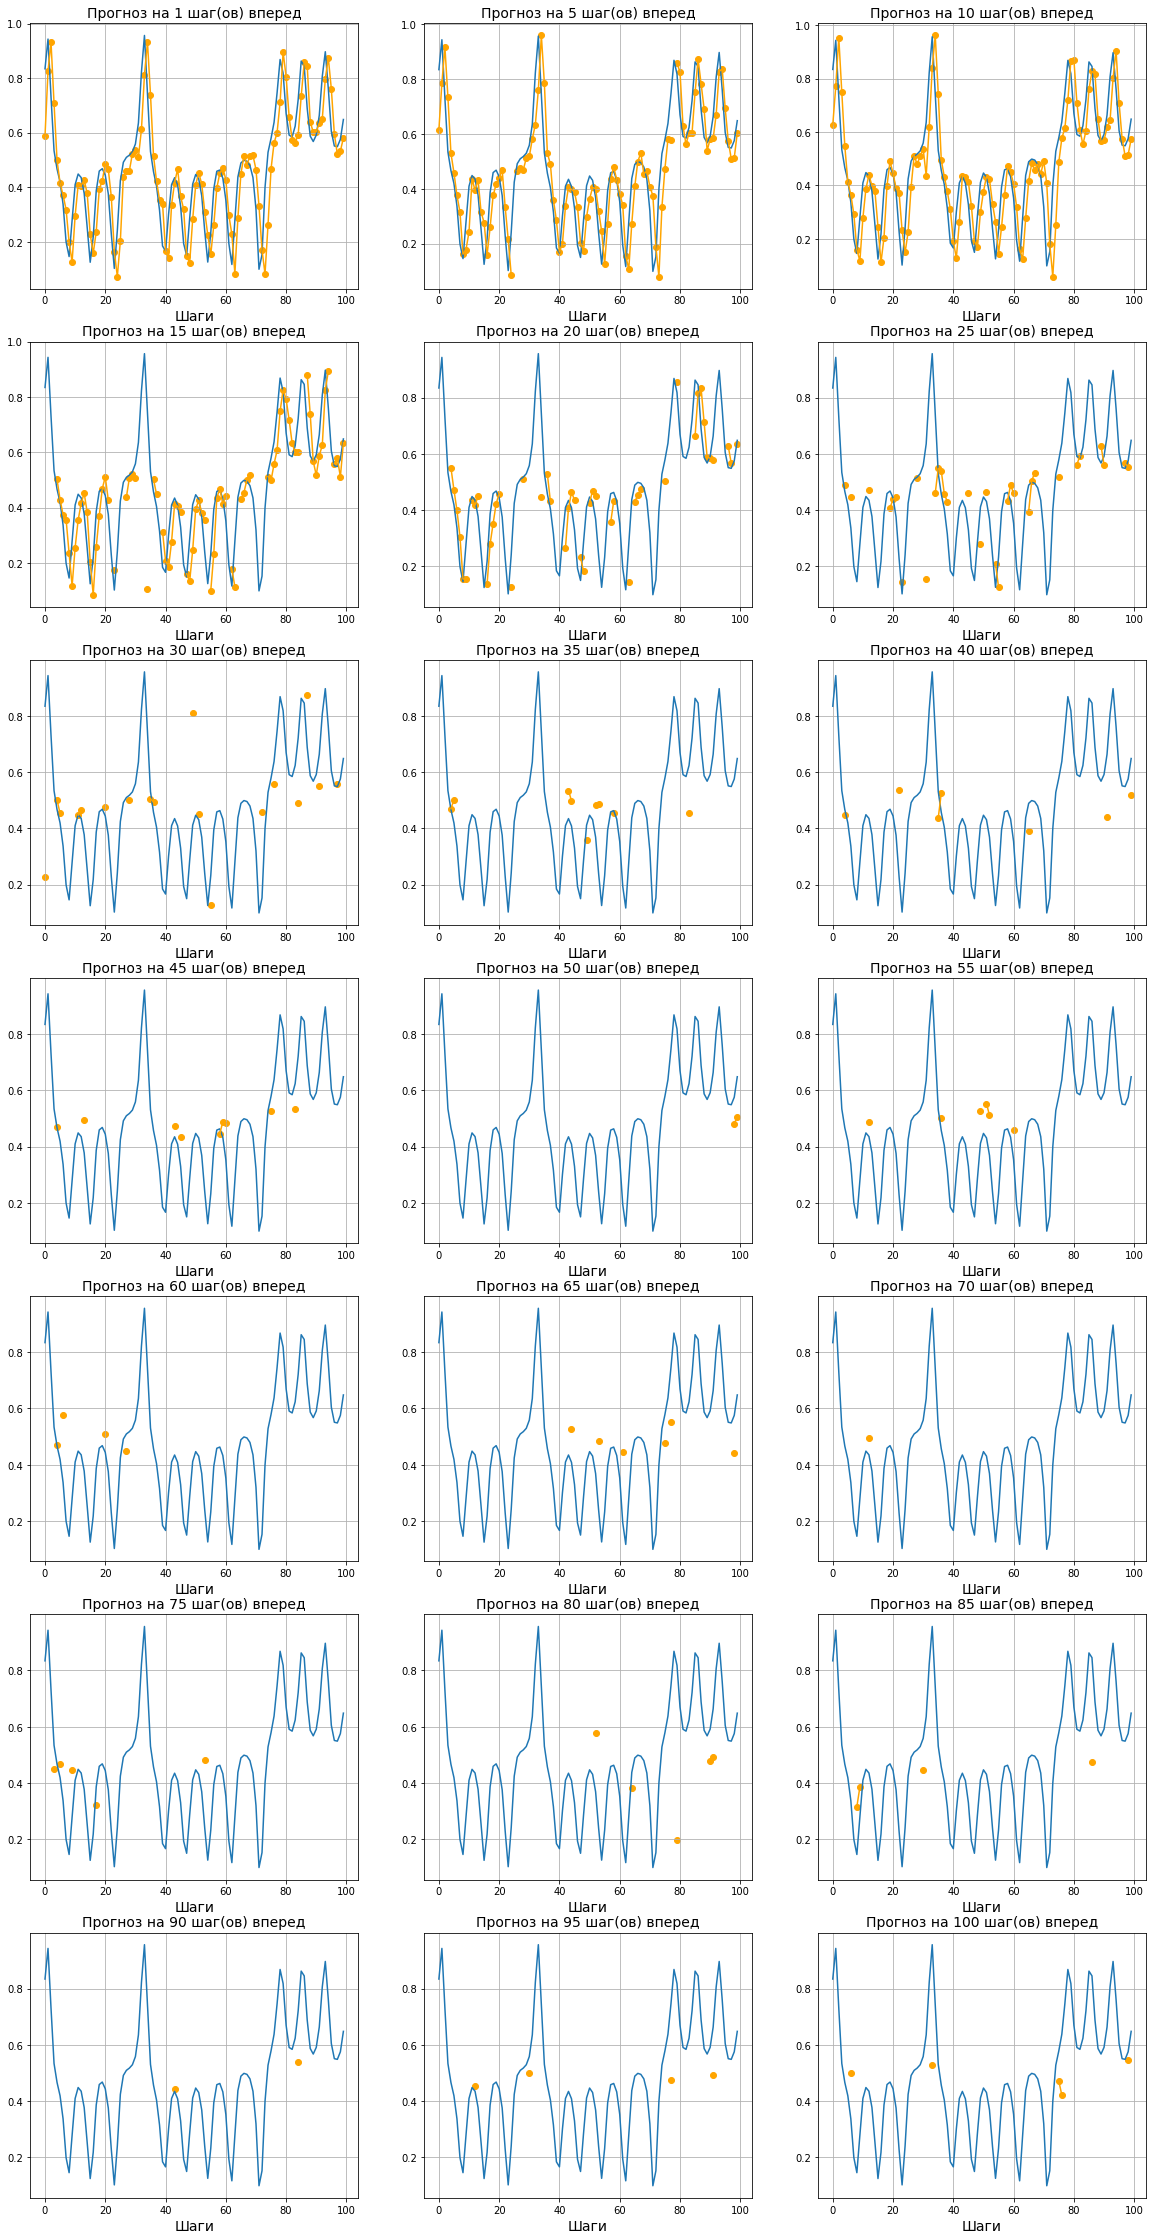

In [64]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=[20, 40])
titles = [f'Прогноз на {i} шаг(ов) вперед' for i in nums]
i = 0

for row in ax:
    for col in row:
        col.grid()
        col.plot(x[10000:10100])
        col.plot(result[i], c='orange')
        col.scatter(range(result[i].size), result[i], c='orange')
        col.set_title(titles[i], fontsize=14)
        col.axes.set_xlabel('Шаги', fontsize=14)
        i += 1

plt.show()

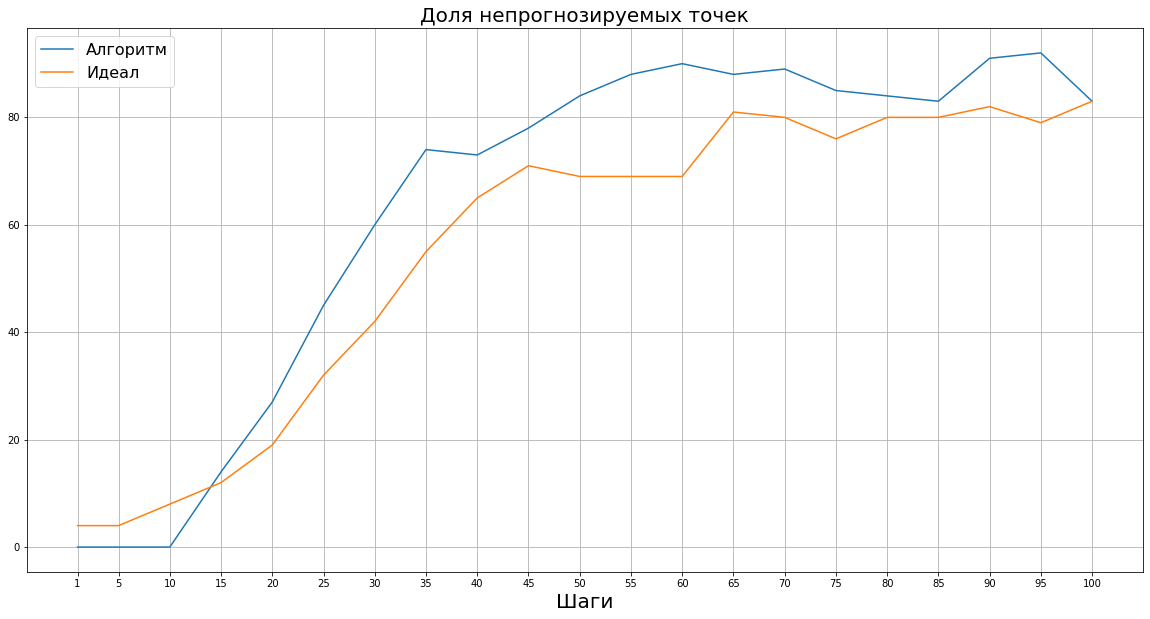

In [30]:
fontsize = 20
xticks = np.arange(0, 105, 5)
xticks[0] = 1
fig = plt.figure(figsize=[20, 10])

plt.grid()
plt.plot(xticks, alg, label='Алгоритм')
plt.plot(xticks, dem, label='Идеал')

plt.xlabel('Шаги', fontsize=fontsize)
plt.xticks(xticks)
plt.legend(fontsize=16)
plt.title('Доля непрогнозируемых точек', fontsize=fontsize)
plt.show()

In [21]:
# Как использовать пулл
split = 900
steps = 100
eps = 0.01

tsp = TSProcessor(7, 5)
tsp.fit(x[:split])

forecast_sets = tsp.pull(steps=steps, eps=eps, n_trajectories=1, noise_amp=0.0)

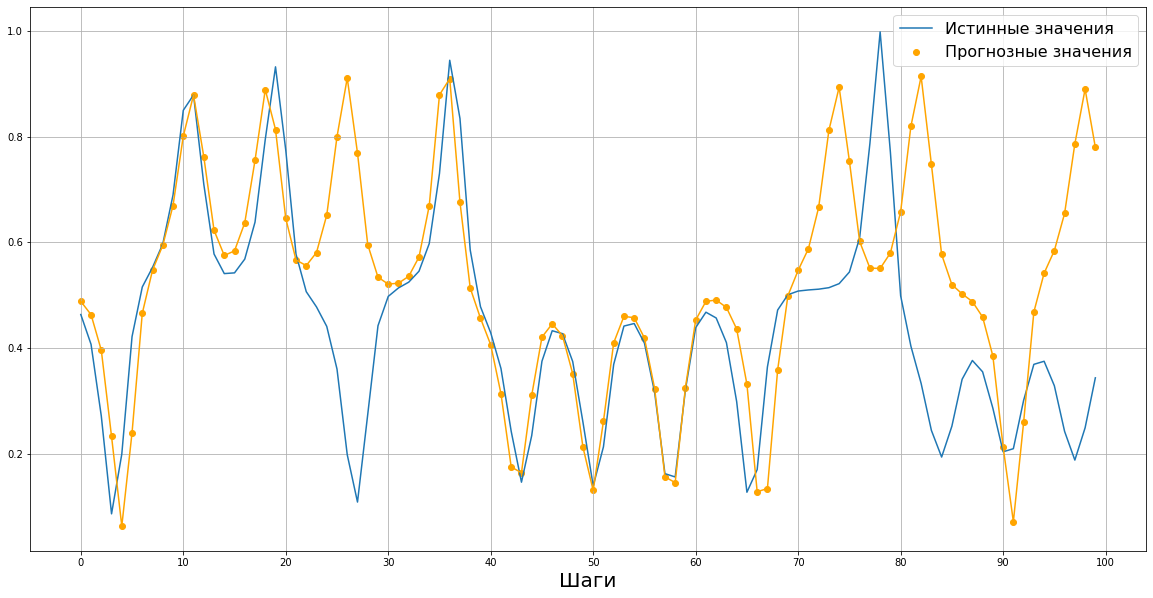

In [23]:
# Energy
result = tsp.cluster_sets(forecast_sets, 0.01, 1)
fontsize = 20
fig = plt.figure(figsize=(20, 10))

plt.grid()
plt.plot(x[split:split + 100], label='Истинные значения')
plt.scatter(range(result.size), result, c='orange', label='Прогнозные значения')
plt.plot(range(result.size), result, c='orange')

plt.xlabel('Шаги', fontsize=fontsize)
plt.xticks(range(0, 110, 10))
plt.legend(fontsize=16)
plt.show()

In [10]:
fig.savefig('fig.png', bbox_inches='tight')

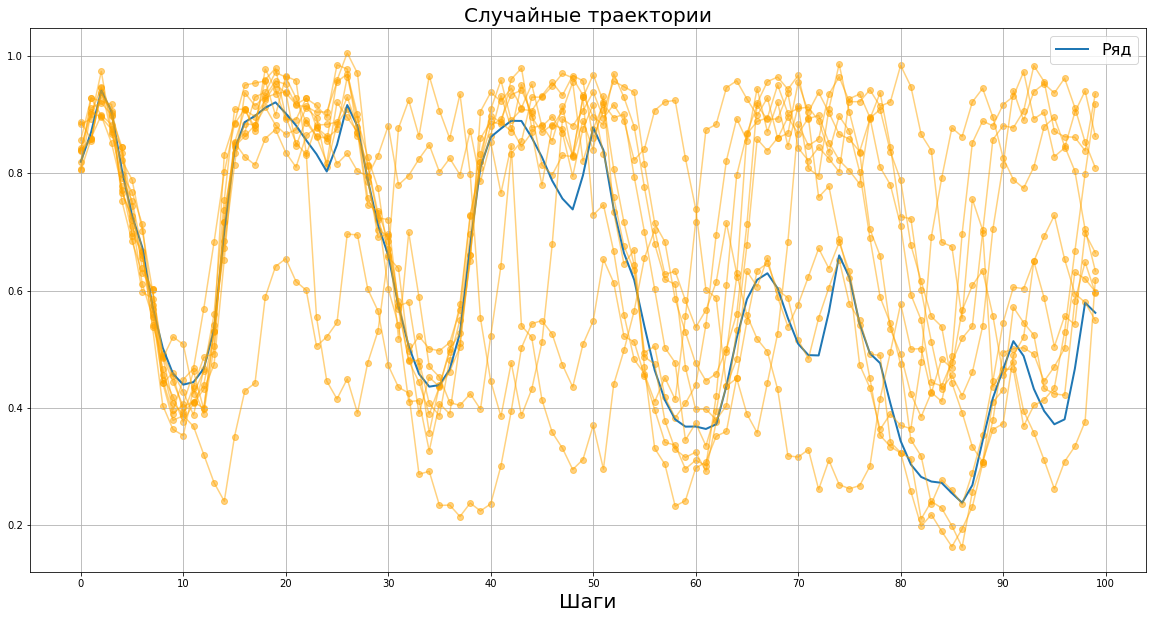

In [73]:
fig = plt.figure(figsize=[20, 10])
plt.grid()
plt.plot(x[split:split + 100], label='Ряд', linewidth=2)

for i in range(forecast_sets.shape[1]):
    plt.scatter(range(forecast_sets[:, i].size), forecast_sets[:, i], c='orange', alpha=0.5)
    plt.plot(forecast_sets[:, i], c='orange', alpha=0.5)

plt.xlabel('Шаги', fontsize=fontsize)
plt.xticks(range(0, 110, 10))
plt.legend(fontsize=16)
plt.title('Случайные траектории', fontsize=fontsize)
plt.show()

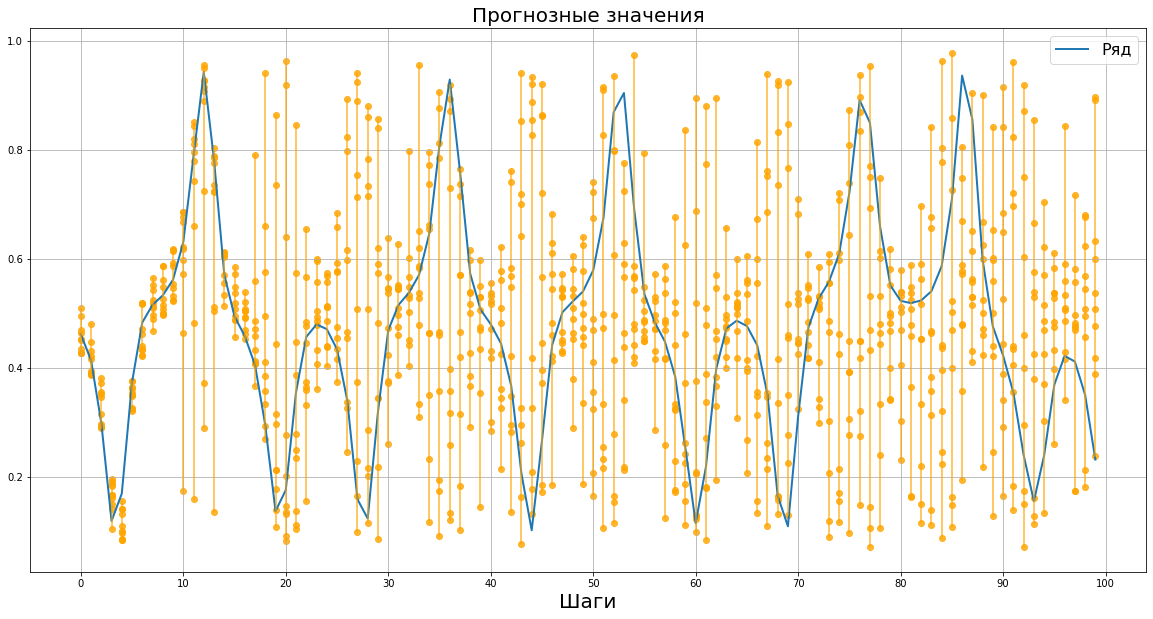

In [50]:
# Если надо посмотреть все точки на кждом ша
fig = plt.figure(figsize = [20, 10])
plt.grid()
plt.plot(x[split:split + steps], label='Ряд', linewidth=2)

for i in range(len(forecast_sets)):
    plt.scatter(np.repeat(i, len(forecast_sets[i])), forecast_sets[i], c='orange', alpha=0.8)
    plt.plot([i, i], [min(forecast_sets[i]), max(forecast_sets[i])], c='orange', alpha=0.8)

plt.xlabel('Шаги', fontsize=fontsize)
plt.xticks(range(0, 110, 10))
plt.legend(fontsize=16)
plt.title('Прогнозные значения', fontsize=fontsize)
plt.show()

In [4]:
# Как использовать пуш
split = 10000
steps = 100
eps   = 0.01

tsp = TSProcessor(4, 10)
tsp.fit(x[:split])

result, point_pools = tsp.push(steps=steps, eps=eps, dbs_eps=0.01, dbs_min_samples=2)

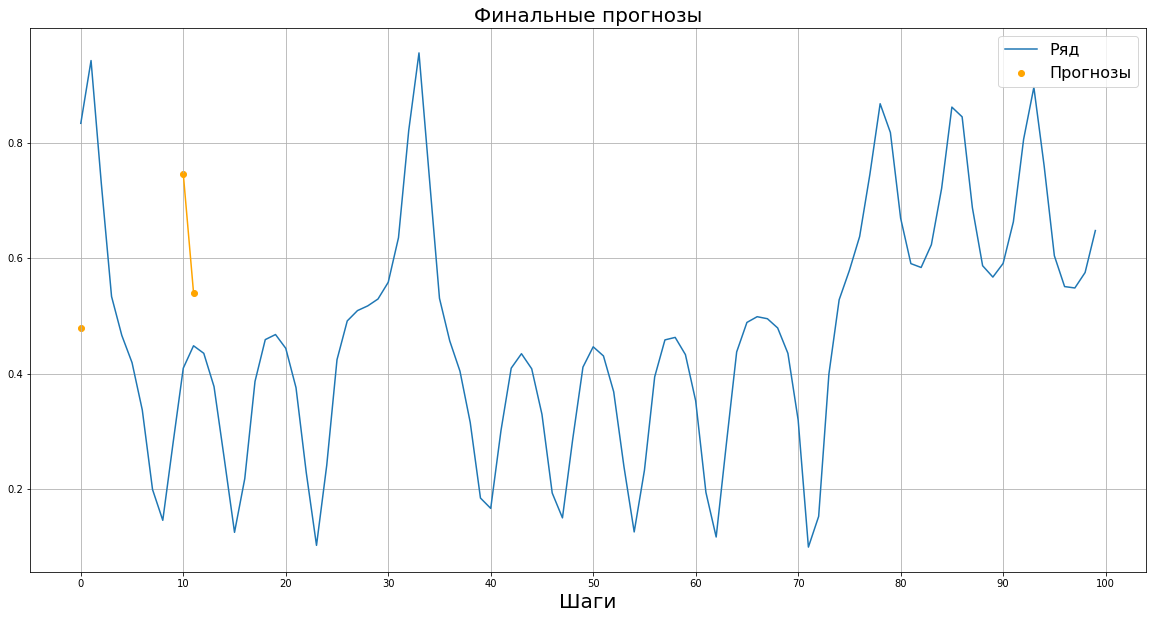

In [8]:
fontsize = 20
fig = plt.figure(figsize=[20, 10])

plt.grid()
plt.plot(x[split:split + 100], label='Ряд')
plt.plot(range(result.size), result, c='orange')
plt.scatter(range(result.size), result, c='orange', label='Прогнозы')

plt.xlabel('Шаги', fontsize=fontsize)
plt.xticks(range(0, 110, 10))
plt.legend(fontsize=16)
plt.title('Финальные прогнозы', fontsize=fontsize)
plt.show()